<a href="https://colab.research.google.com/github/AbdulQadir98/Image-Processing/blob/master/Get_image_dominant_colors_using_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get image dominant colors using clustering
### Clustering with the K-means algorithm
The K-means algorithm cluster the different pixel colors in the matrix that represents the image




In [ ]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
import cv2

In [ ]:
# utility function to convert rgb into hex
def rgb2hex(rgb):
  hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
  return hex

print(rgb2hex([255, 255, 255]))

#ffffff


Applying algorithm to the image

In [35]:
# set default k value = 6
def plot_image_info(img_path, k=6):
  
  # load image
  img_bgr = cv2.imread(img_path)
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

  # resize image to speed up the process
  resized_img = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA)

  # reshape the image to be a list of pixels
  img_list = resized_img.reshape((resized_img.shape[0] * resized_img.shape[1]), 3)

  # cluster the pixels using the 'K-means model'
  clt = KMeans(n_clusters=k)

  # assign labels
  labels = clt.fit_predict(img_list)

  # count labels to find most popular
  label_counts = Counter(labels)
  total_labels = sum(label_counts.values())

  # plots
  ## image
  plt.figure(figsize=(14,8))
  plt.subplot(221)
  plt.imshow(img_rgb)
  plt.axis('off')

  ## pie chart
  center_colors = list(clt.cluster_centers_)
  ordered_colors = [center_colors[i]/255 for i in label_counts.keys()] 
  color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]

  plt.subplot(222)
  plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
  plt.axis('equal')
  plt.show()

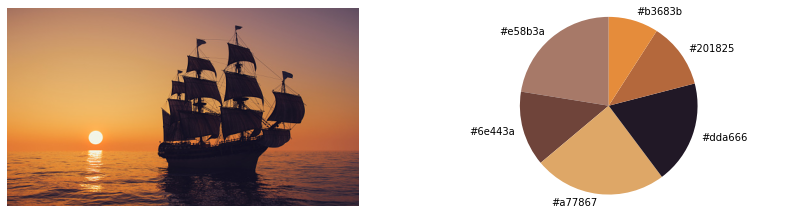

In [ ]:
plot_image_info('/content/ship.jpg')

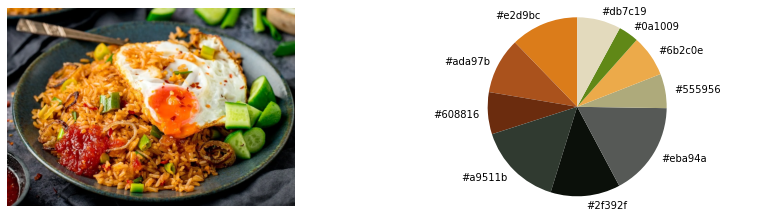

In [ ]:
# increase the k value
plot_image_info('/content/rice.webp', 10)

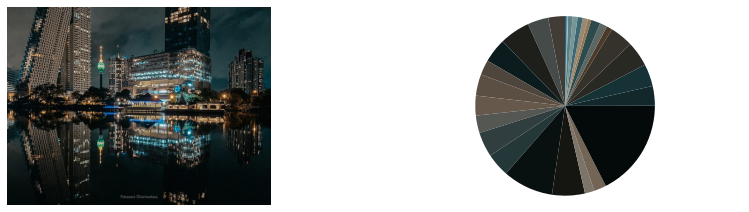

In [36]:
plot_image_info('/content/colombo.jpg', 30)